In [2]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd

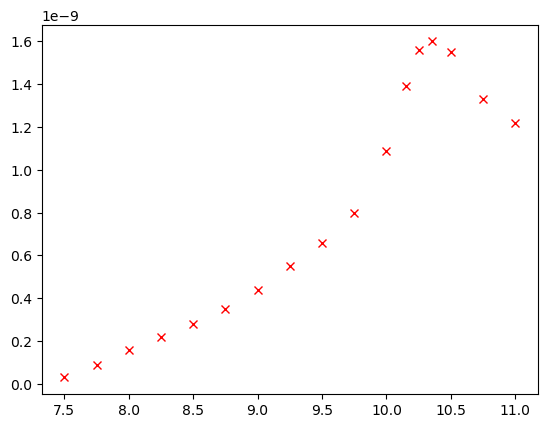

In [3]:
# Aufgabe 1

# Restgasspektrum
E_e = 64.96 #V
E_e_std = 0.05 #V
# 1-50 Tek 27 10**-10 (Partialdruckfaktor)
# 50-100 Tek 28 10**-10 (Partialdruckfaktor)

# Messung des Partialdrucks bei verschiedenen I_e
poti_stellung = np.array([11, 10.75, 10.5 , 10.35, 10.25 , 10.15 , 10.0 , 9.75 , 9.5 , 9.25 , 9.0 , 8.75 , 8.5 , 8.25 , 8.0 , 7.75 , 7.5])
# I_e = np.array([]) # Umrechnung über Tabelle (gerade)
p = np.array([ 1.22 , 1.33, 1.55 , 1.6 , 1.56 , 1.39 , 1.09 , 0.80 , 0.66 , 0.55 , 0.44 , 0.35 , 0.28 , 0.22 , 0.16 , 0.09 , 0.03]) * 10**-9 # mbar
p_std = 0.02 * 10**-9
m = 14 # Masse von N2

plt.plot(poti_stellung, p, "rx")


# allgemeiner Aufschrieb

Ionisationsmessröhre bei 5.6 * 10 ** -7 mbar
Potentiometer dauerhaft bei 10.15
Auflösung durch FWHM

Luftspektrum: 10 ** -9   
Massezahl 18: 10 ** -10  TEK29
Massezahl 28: 10 ** -9   TEK30
Massezahl 32: 10 ** -9   TEK31
Massezahl 44: 10 ** -10  TEK32

Ionisationsmessröhre bei 1.2 * 10 ** -6 mbar
Massezahl 14: 10 ** -10 TEK34 / TEK37
Massezahl 28: 10 ** -10 TEK36

Argon
Ionisationsmessröhre bei 5.3 * 10 ** -6 mbar
Massezahl 40: 10 ** -10 TEK38 / TEK40
Massezahl 20: 10 ** -10 TEK39

Propan
E_e = [30,60,90]
TEK41 10 ** -9
TEK42 10 ** -8 
TEK43 10 ** -7 (80)
TEK44 10 ** -7 (90)

Tigel

